In [3]:
#imports
from computer_vision  import *

In [14]:
ret = False

video_capture = setup_camera(-8)
while ret == False:
    ret,world = video_capture.read()
    print(ret)

time.sleep(2)
smooth_world = image_smoothing(world)
#masks
obst_mask = object_mask("obstacle", world)
start_mask = object_mask("start", world)
goal_mask = object_mask("goal", world)

masked_world = cv2.bitwise_and(smooth_world, smooth_world, mask=obst_mask)
gray_world = cv2.cvtColor(masked_world, cv2.COLOR_BGR2GRAY)
segmented_world = image_segmentation(gray_world)
transformed_world = image_morph_transform(segmented_world)
plt.imshow(transformed_world)



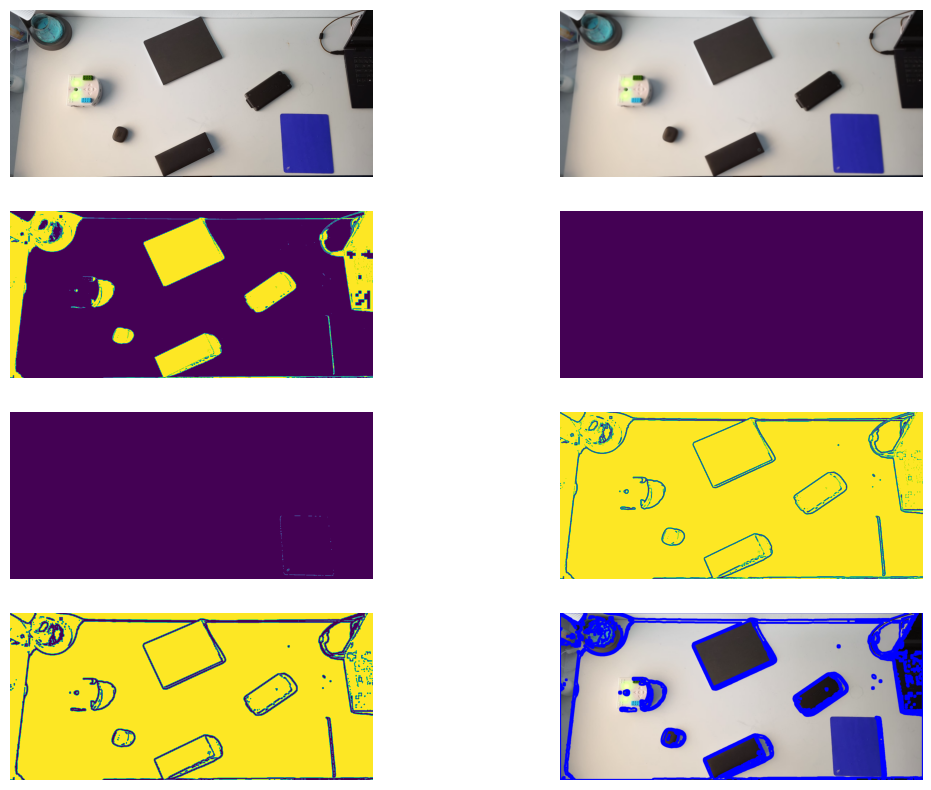

In [11]:
# plotting
images = [original_world, smooth_world, obst_mask, start_mask, goal_mask, segmented_world, transformed_world, contoured_world]
fig, ax = plt.subplots(4, 2, figsize=(13, 10))
i = j = 0
for image in images:
    ax[j,i].imshow(image)
    if i >=3 & j >=3:
        ax[j,i].imshow(image, cmp='gray')
    ax[j,i].axis('off')
    i += 1
    if i == 2:
        i = 0
        j += 1
   